In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# seaborn import from Datacamp.com
import seaborn as sns

import requests
import json

# Import geopy
import geopy

In [2]:
path1 = "CSV/Traffic_Crashes_-_Crashes-2018.csv"
path2 = "CSV/Traffic_Crashes_-_Vehicles-2018.csv"
path3 = "CSV/Traffic_Crashes_-_People-2018.csv"

In [3]:
people_data = pd.read_csv(path3)
people_data.head(5)

C:\Users\paull\AppData\Local\Temp\ipykernel_3068\3018014922.py:1: DtypeWarning: Columns (14,15,22,23,24,25,26,27,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  people_data = pd.read_csv(path3)


,Unnamed: 0.1,Unnamed: 0,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,0,54,P114359,PASSENGER,7e27bf3caa1b66715bfbdd9fd8525f64565dfe1caeb070...,JB492305,486598.0,10/27/2018 12:59:00 PM,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,883,P114360,PASSENGER,b119fc395ec3a3292f031e88df7e72d533bc132b2989d0...,JB492331,486601.0,10/27/2018 09:33:00 AM,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1156,P114361,PASSENGER,311f3cdd3d2c01dae8982bdff7ef886d7a0c7d6c6367db...,JB492327,486602.0,10/27/2018 01:00:00 PM,3.0,CHICAGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1220,P114362,PASSENGER,5c26c628d28b279d2b8992a3b0b7eb1ad7b1d01d3d3bbb...,JB492267,486605.0,10/27/2018 01:00:00 PM,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1607,P114363,PASSENGER,5c26c628d28b279d2b8992a3b0b7eb1ad7b1d01d3d3bbb...,JB492267,486605.0,10/27/2018 01:00:00 PM,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
people_data['AGE'].value_counts().nlargest(50)

27.0    5459
25.0    5438
28.0    5377
26.0    5317
24.0    5281
29.0    5168
23.0    5103
30.0    4790
31.0    4489
22.0    4485
33.0    4306
32.0    4272
36.0    4068
35.0    4056
34.0    3987
21.0    3945
37.0    3840
38.0    3773
39.0    3601
20.0    3580
40.0    3387
41.0    3358
42.0    3240
47.0    3193
45.0    3147
48.0    3142
19.0    3102
43.0    3092
44.0    3073
46.0    3065
49.0    2898
51.0    2867
52.0    2855
50.0    2854
18.0    2779
54.0    2744
53.0    2714
55.0    2593
56.0    2491
57.0    2457
58.0    2396
0.0     2332
59.0    2252
60.0    2194
61.0    2050
62.0    1931
17.0    1926
63.0    1882
64.0    1580
65.0    1511
Name: AGE, dtype: int64

In [6]:
# filter dataset for outliers

agedat = people_data[['AGE','INJURY_CLASSIFICATION']].copy()
agedat = agedat[agedat.AGE >= 13]
agedat = agedat[agedat.AGE <= 102]
agedat = agedat.dropna()
agedat.head()

,AGE,INJURY_CLASSIFICATION
0,18.0,NO INDICATION OF INJURY
7,43.0,NO INDICATION OF INJURY
8,30.0,"REPORTED, NOT EVIDENT"
9,32.0,"REPORTED, NOT EVIDENT"
10,16.0,NO INDICATION OF INJURY


In [7]:
agedat['AGE'].describe()

count    183173.000000
mean         39.666583
std          15.743494
min          13.000000
25%          27.000000
50%          37.000000
75%          51.000000
max         101.000000
Name: AGE, dtype: float64

# Visualizations

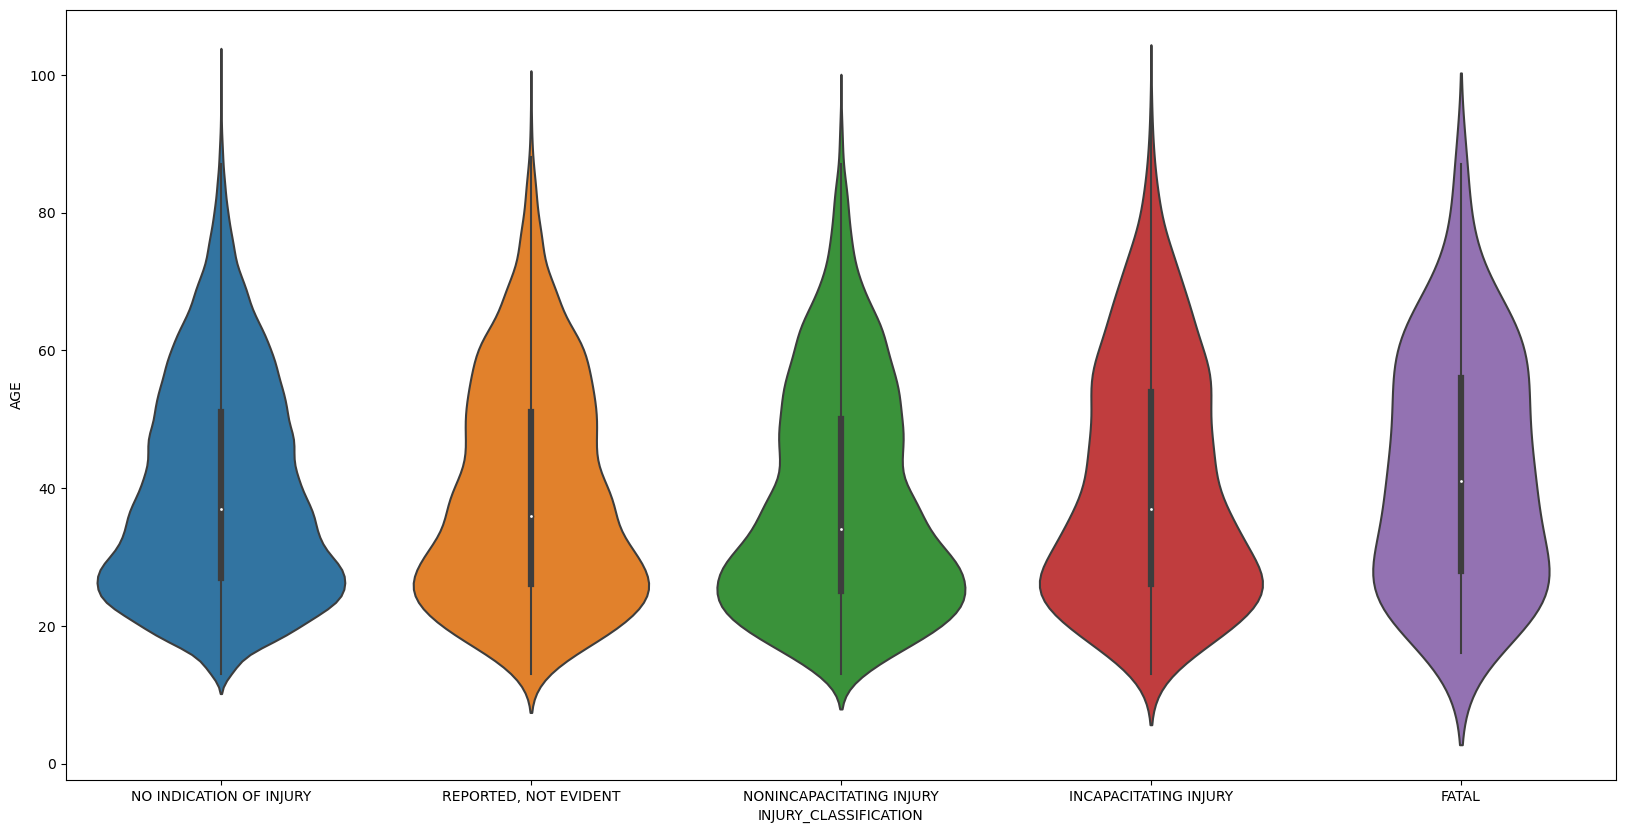

In [8]:
# Seaborn violin-style plot of Injury Type by Age

plt.figure(figsize=(20,10))
sns.violinplot(x='INJURY_CLASSIFICATION', y = 'AGE', data=agedat)
plt.show()

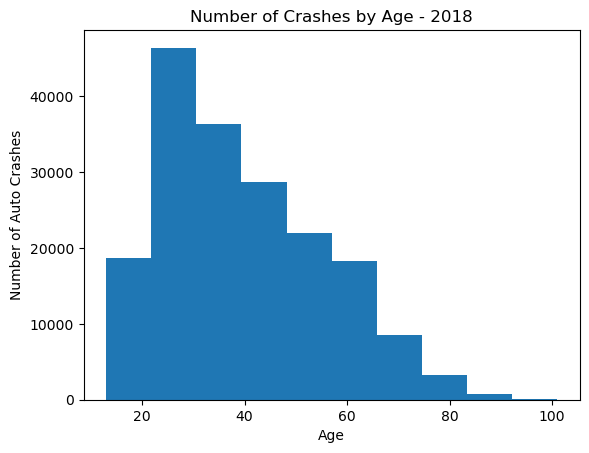

In [14]:
# Injury by Age Histogram

plt.hist(agedat['AGE'])
plt.title('Number of Crashes by Age - 2018')
plt.xlabel('Age')
plt.ylabel('Number of Auto Crashes')
plt.show()

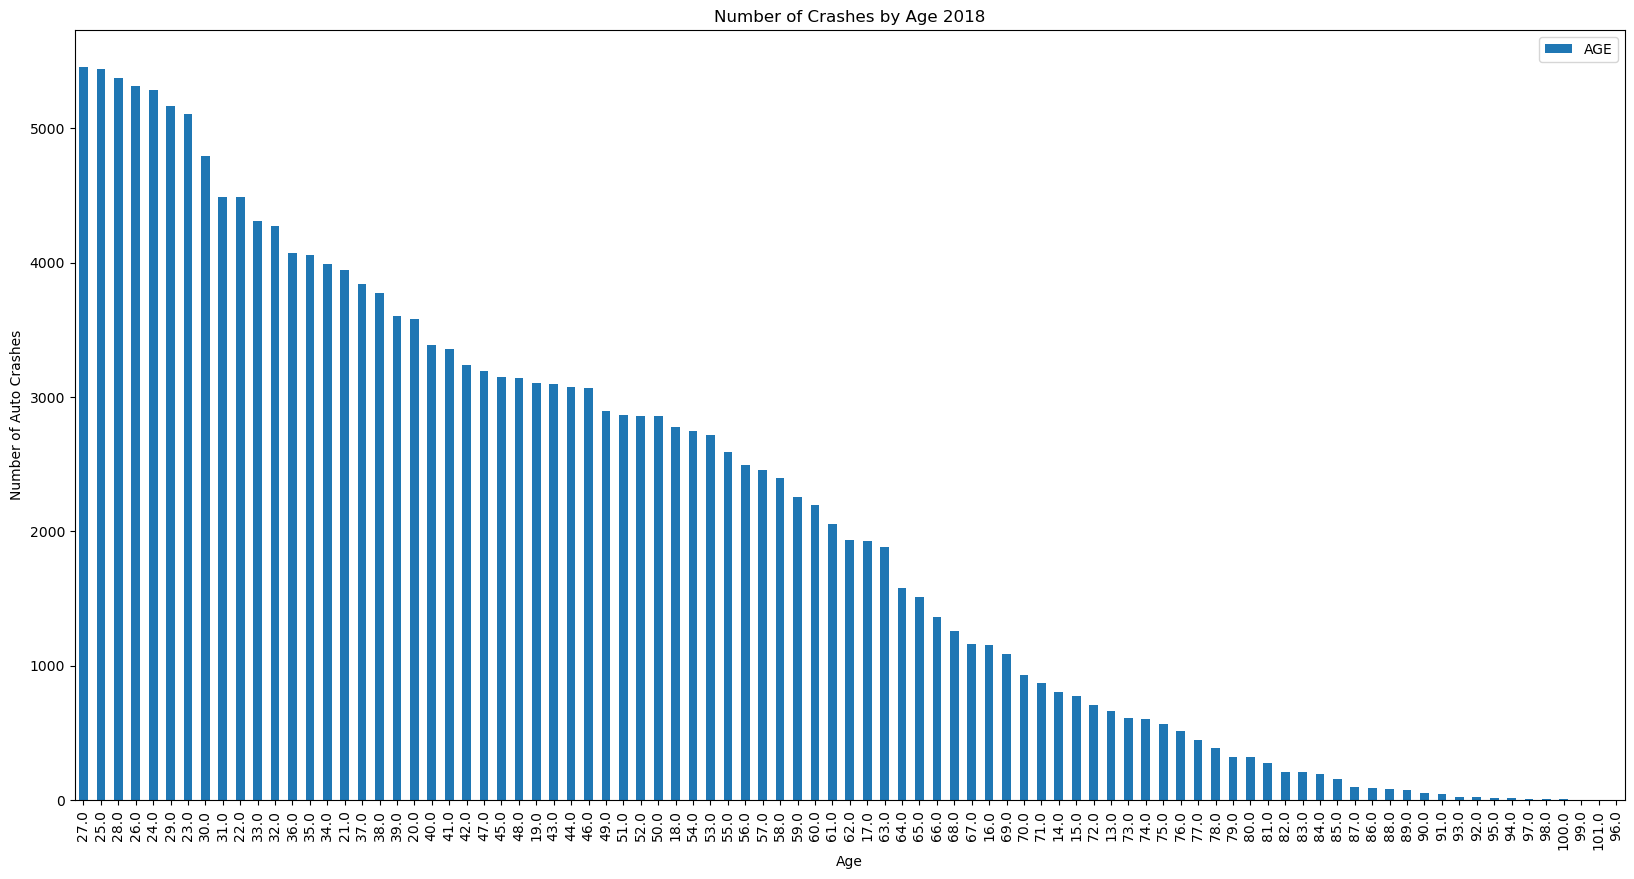

In [15]:
# Injury by Age Bar Chart

plt.figure(figsize=(20,10))
agedat['AGE'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Number of Crashes by Age 2018')
plt.xlabel('Age')
plt.ylabel('Number of Auto Crashes')
plt.show()